<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes with Python**

In [349]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [351]:
# Untuk melihat struktur DataFrame secara ringkas seperti jumlah data, missing values dan tipe data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [352]:
for col in df.columns:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())


=== ID ===
ID
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64

=== Age ===
Age
18    935
34    354
32    352
37    346
35    338
38    325
31    310
30    310
40    308
36    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
51    133
19    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
64     14
65     14
66     13
70      8
67      8
68      8
72      7
80      2
71      2
73      2
69      2
77      1
75      1
Name: count, dtype: int64

=== Gender ===
Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

=== Country ===
Country
Canada         543
India          524
Norway         523
China          521
UK    

In [353]:
# Untuk menampilkan bentuk deskriptif dari data yang ada seperti count, mean, std, min, max, dan quartile setiap kolom numerik pada DataFrame.
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


### Missing values in variables

In [354]:
# Mencari persentase nilai null setiap kolomnya
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Membuat dataframe baru untk memvisualisasikan tabel dataframe untuk nilai null setiap kolom
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Memfilter agar yang ditampilkan hanya yang memiliki nilai null saja
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage
Health_Issues,5941,59.41%


In [355]:
# Menampilkan nilai unik setiap kolom untuk mencari tahu apakah ada nilai nilai yang aneh yang perlu di proses untuk pembersihan data
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'ID':
[    1     2     3 ...  9998  9999 10000]
--------------------
Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.

In [356]:
# Telah diketahui bahwa nan dalam Health Issues itu maksudnya none jadi perlu kita perbaiki untuk modeling

df['Health_Issues'] = df['Health_Issues'].fillna('None')

# ID ga guna ga dipakai buat predict n visualisasi jadi di drop aja
df = df.drop(columns=['ID'])

In [357]:
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## Distribusi Health Issues

In [358]:
df['Health_Issues'].value_counts().reindex(['None','Mild','Moderate','Severe'])

,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17


/tmp/ipython-input-858301329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Health_Issues', data=df, order=['None','Mild','Moderate','Severe'], palette='Set2')


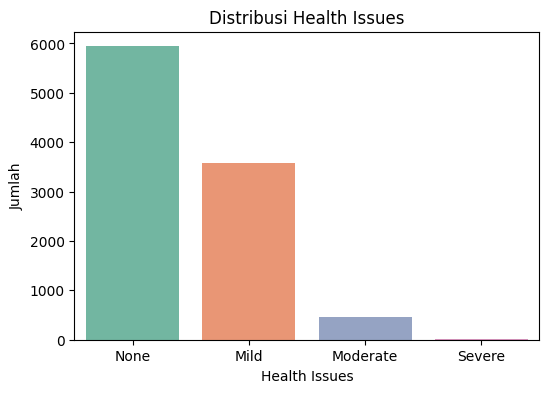

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Health_Issues', data=df, order=['None','Mild','Moderate','Severe'], palette='Set2')
plt.title('Distribusi Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Jumlah')
plt.show()


**Key Findings / Insights**

**Berdasarkan bar chart distribusi Health Issues:**

1. Mayoritas peserta tidak memiliki masalah kesehatan (None), dengan jumlah 5.941 dari total 10.000 peserta.
2. Kategori Mild menempati posisi kedua, dengan jumlah 3.579 peserta, menunjukkan ada sebagian populasi yang mengalami masalah kesehatan ringan.
3. Kategori Moderate jauh lebih sedikit, sekitar 463 peserta, menandakan kasus masalah kesehatan sedang relatif jarang.
4. Kategori Severe sangat sedikit, hanya 17 peserta, menunjukkan kasus kesehatan berat hampir tidak ada dalam dataset.

**Insight yang bisa diambil:**

1. Sebagian besar populasi sehat, namun ada segmen yang mulai mengalami masalah kesehatan ringan (Mild) sehingga intervensi pencegahan bisa difokuskan pada kelompok ini.
2. Data cukup tidak seimbang, karena None jauh lebih banyak dibanding kategori lain. Ini penting diperhatikan saat melakukan modeling prediksi Health Issues, karena model bisa bias ke kategori None.
3. Meskipun kasus Severe jarang, tetap perlu diperhatikan untuk analisis risiko dan strategi mitigasi kesehatan bagi kelompok kecil ini.

## Hubungan Sleep Quality vs Health Issues

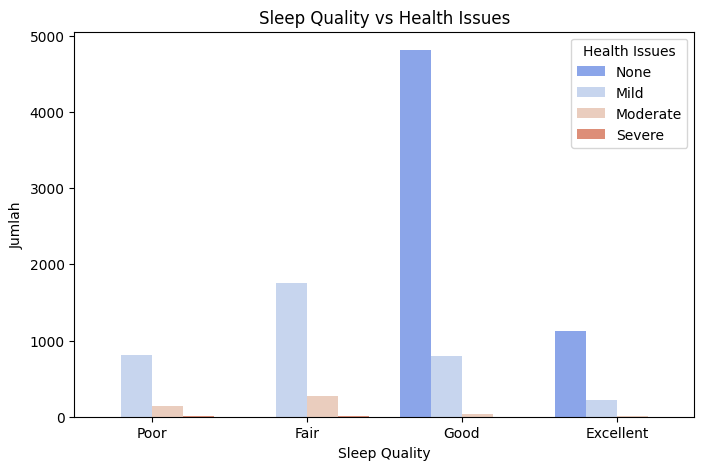

In [360]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sleep_Quality', hue='Health_Issues', data=df,
              order=['Poor','Fair','Good','Excellent'],
              hue_order=['None','Mild','Moderate','Severe'],
              palette='coolwarm')
plt.title('Sleep Quality vs Health Issues')
plt.xlabel('Sleep Quality')
plt.ylabel('Jumlah')
plt.legend(title='Health Issues')
plt.show()


**Key Findings / Insights**

**Berdasarkan bar chart Sleep Quality vs Health Issues:**

1. Sleep Quality Good didominasi oleh peserta tanpa masalah kesehatan (None), dengan jumlah hampir 4.800, menunjukkan peserta yang tidur cukup baik cenderung sehat.
2. Sleep Quality Fair memiliki campuran peserta None dan Mild, dengan jumlah Mild sekitar 1.750, menandakan sebagian peserta dengan kualitas tidur sedang mulai mengalami masalah kesehatan ringan.
3. Sleep Quality Poor sebagian besar peserta berada pada kategori Mild (800 peserta), sementara Moderate dan Severe relatif sedikit (150 dan 20 peserta), menunjukkan kualitas tidur buruk terkait dengan peningkatan masalah kesehatan ringan hingga sedang.
4. Sleep Quality Excellent didominasi peserta None (1.100 peserta), dengan jumlah peserta Mild sekitar 250, dan Moderate/Severe hampir tidak ada, menandakan kualitas tidur yang sangat baik berkorelasi dengan kesehatan yang optimal.

**Insight yang bisa diambil:**

1. Semakin baik kualitas tidur, semakin besar kemungkinan peserta sehat (None).
2. Peserta dengan kualitas tidur Poor atau Fair memiliki risiko lebih tinggi mengalami masalah kesehatan ringan (Mild) dan sedang (Moderate).
3. Kasus Severe tetap sangat jarang di semua kategori tidur, tetapi tetap perlu diperhatikan.
4. Fokus intervensi kesehatan bisa diarahkan pada peserta dengan tidur Poor dan Fair untuk pencegahan masalah kesehatan.

## Scatter plot Coffee Intake vs Sleep Hours dengan warna Health Issues

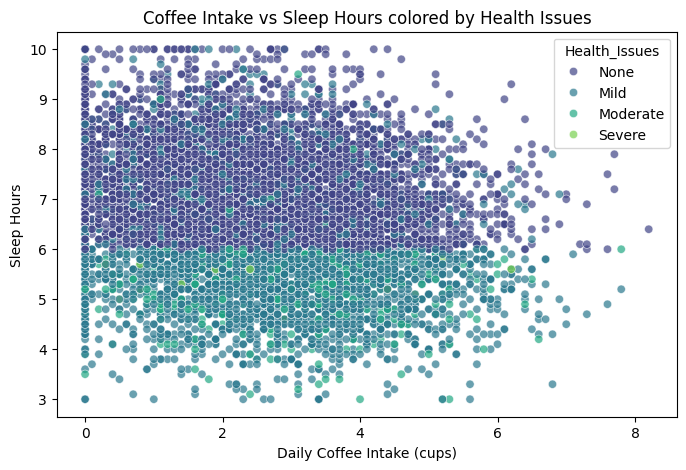

In [361]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Coffee_Intake', y='Sleep_Hours', hue='Health_Issues', data=df,
                palette='viridis', alpha=0.7)
plt.title('Coffee Intake vs Sleep Hours colored by Health Issues')
plt.xlabel('Daily Coffee Intake (cups)')
plt.ylabel('Sleep Hours')
plt.show()


**Key Findings / Insights**

**Berdasarkan scatter plot hubungan konsumsi kopi harian dengan jam tidur yang diberi warna sesuai kategori Health Issues:**

1. Peserta tanpa masalah kesehatan (None) tersebar di berbagai jam tidur, tetapi cenderung memiliki jam tidur lebih tinggi (6–9 jam) dan konsumsi kopi rendah hingga sedang (0–4 cup/hari), menandakan tidur cukup berkorelasi dengan kesehatan yang lebih baik.
2. Peserta dengan masalah kesehatan ringan (Mild) banyak terdapat pada jam tidur lebih rendah (4–6 jam) dan konsumsi kopi bervariasi (0–6 cup/hari), menunjukkan kurang tidur atau konsumsi kopi tinggi bisa berkaitan dengan masalah kesehatan ringan.
3. Kasus Moderate tersebar lebih sedikit, umumnya pada jam tidur rendah (3–6 jam) dan konsumsi kopi sedang (1–5 cup/hari), menandakan kualitas tidur rendah dan konsumsi kopi tertentu dapat memengaruhi kesehatan sedang.
4. Kasus Severe sangat jarang, tetapi terlihat pada jam tidur sangat rendah (~3–5 jam) dengan konsumsi kopi rendah hingga sedang (1–4 cup/hari), menunjukkan kondisi kesehatan parah terkait dengan kurang tidur ekstrim.

**Insight yang bisa diambil:**

1. Jam tidur yang cukup (6–9 jam) berkorelasi dengan kemungkinan lebih besar peserta sehat (None), meskipun konsumsi kopi bervariasi.
2. Kurang tidur (≤6 jam) meningkatkan risiko mengalami masalah kesehatan ringan hingga sedang (Mild–Moderate), terutama bila dikombinasikan dengan konsumsi kopi sedang hingga tinggi.
3. Kasus Severe sangat jarang, tetapi peserta yang tidur sangat sedikit berisiko tinggi mengalami masalah kesehatan.
4. Intervensi kesehatan dapat difokuskan pada peserta dengan jam tidur rendah untuk mengurangi risiko masalah kesehatan.

### Encode categorical variables


In [362]:
# Ordinal Data
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map  = {'Low': 1, 'Medium': 2, 'High': 3}
health_issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
occupation_map = {'Other': 0,'Service': 1,'Office': 2,'Student': 3,'Healthcare': 4}
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}

df['Sleep_Quality']  = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level']   = df['Stress_Level'].map(stress_level_map)
df['Health_Issues']  = df['Health_Issues'].map(health_issues_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Gender'] = df['Gender'].map(gender_map)

country_map = {
    'Germany': 0, 'Brazil': 1, 'Spain': 2, 'Mexico': 3, 'France': 4,
    'Canada': 5, 'UK': 6, 'Switzerland': 7, 'Netherlands': 8, 'Italy': 9,
    'China': 10, 'Japan': 11, 'Belgium': 12, 'Finland': 13, 'Australia': 14,
    'USA': 15, 'Sweden': 16, 'India': 17, 'Norway': 18, 'South Korea': 19
}

df['Country'] = df['Country'].map(country_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
6027,18,0,18,0.6,58.2,6.5,3,29.0,58,1,13.6,0,0,0,1
1144,32,0,2,0.6,61.5,4.0,1,20.9,50,3,8.9,1,4,0,0
8990,54,1,9,2.2,211.1,8.2,4,20.2,78,1,2.0,1,0,0,1
4408,41,0,3,2.8,264.6,6.1,3,18.1,66,1,12.6,0,4,0,1
4143,38,1,2,2.2,207.3,8.7,4,23.9,85,1,13.8,0,2,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [363]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [364]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,0,3.5,328.1,7.5,3,24.9,78,1,14.5,0,0,0
1,33,0,0,1.0,94.1,6.2,3,20.0,67,1,11.0,1,0,0
2,42,0,1,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,53,0,0,2.6,249.2,7.3,3,24.7,71,1,6.6,0,0,0
4,32,1,2,3.1,298.0,5.3,2,24.1,76,2,8.5,3,0,1


In [365]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [366]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [367]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [368]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,2,4.3,405.6,5.4,2,18.0,86,2,2.4,1,0,1
1561,26,0,17,0.0,0.0,5.5,2,28.3,75,2,10.8,0,0,0
1670,32,0,19,2.8,268.1,7.3,3,27.4,69,1,8.6,2,0,0
6087,18,0,19,2.2,208.6,8.1,4,16.3,83,1,8.9,0,0,1
6669,43,1,6,2.6,251.1,9.4,4,25.4,68,1,3.4,2,0,0


In [369]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,18,2.6,245.9,6.7,3,30.1,76,1,1.9,1,0,1
4684,22,1,3,3.1,293.1,7.6,3,20.4,69,1,5.0,1,0,0
1731,30,0,14,3.9,372.4,6.4,3,27.5,75,1,13.8,2,0,0
4742,35,0,0,1.0,92.5,5.3,2,23.1,71,2,2.4,1,0,0
4521,47,0,9,1.3,119.0,6.9,3,28.4,64,1,9.6,2,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [370]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [371]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [372]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [373]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

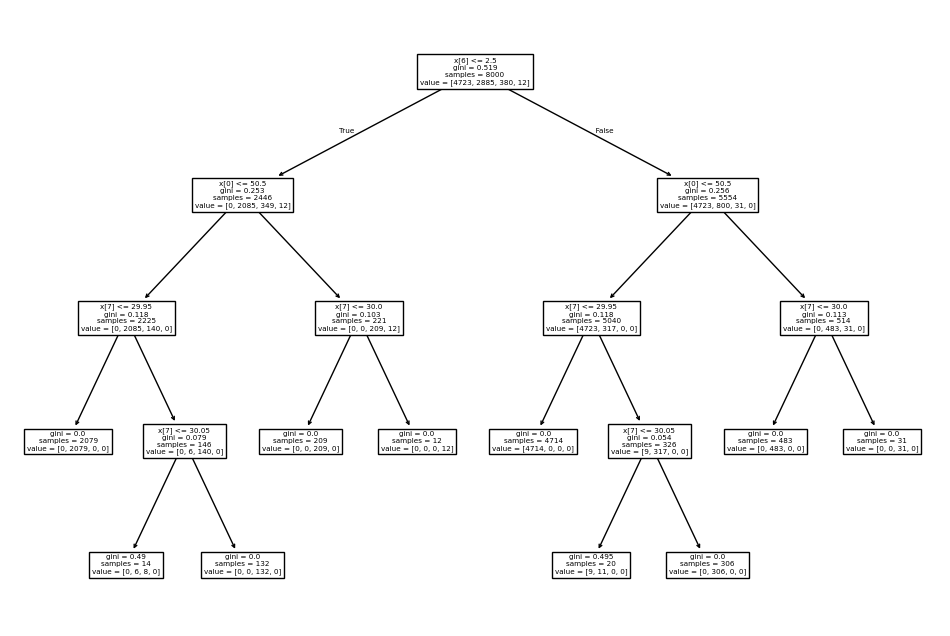

In [374]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [375]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [376]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [377]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

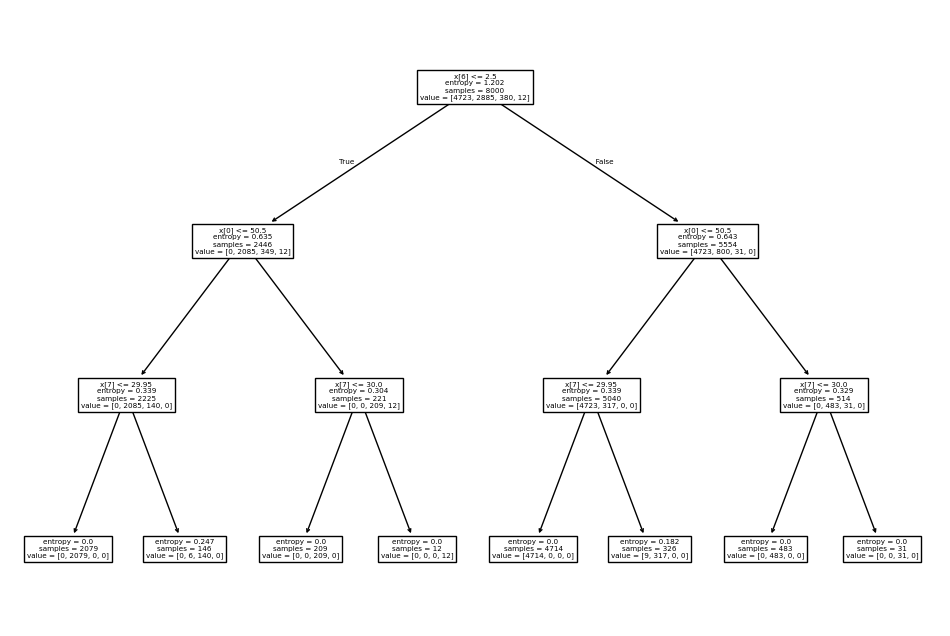

In [378]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [379]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [380]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [381]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [382]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [383]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [384]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.88      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



Kesimpulan:

- Naive Bayes: Akurasi baik (85,7%), cepat dan sederhana, tapi kurang optimal jika fitur berkorelasi.

- Decision Tree (Entropy & Gini): Akurasi sangat tinggi (99,65%), menangkap pola kompleks, tapi ada risiko overfitting.

- Perbandingan: Decision Tree lebih akurat daripada Naive Bayes, sementara pilihan antara entropy atau gini tidak terlalu memengaruhi hasil di dataset ini.

Secara umum, Decision Tree lebih unggul untuk akurasi, namun Naive Bayes lebih ringan dan sederhana.

In [385]:
input_data = {
    'Age': 28,
    'Gender': 0,  # Male
    'Country': 1, # Brazil
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 1, # Poor
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 3, # High
    'Physical_Activity_Hours': 0, # Low
    'Occupation': 3, # Student
    'Smoking': 1, # Yes
    'Alcohol_Consumption': 1 # Yes
}

input_df = pd.DataFrame([input_data])
prediction = clf_gini.predict(input_df)
inverse_health_issues_map = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
print(inverse_health_issues_map[prediction[0]])


Mild


**Prediksi Model**

Model Decision Tree (Gini) memprediksi Health Issues = Mild.

**Interpretasi:**

Berdasarkan kombinasi faktor-faktor di atas, model menilai ada kemungkinan masalah kesehatan ringan. Faktor yang paling berpengaruh kemungkinan besar:

1. Tidur buruk (5 jam, kualitas poor)
2. Tingkat stres tinggi
3. Konsumsi kafein & kebiasaan merokok/alkohol
4. Aktivitas fisik rendah

Model menempatkan individu ini pada kategori Mild, artinya ada potensi masalah kesehatan ringan tapi belum serius (belum Moderate atau Severe). Ini bisa menjadi sinyal untuk perbaikan gaya hidup seperti tidur lebih lama, kurangi kafein/alcohol, dan tingkatkan aktivitas fisik.